In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('data_mashable.csv')
df = df.dropna()
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


# Explain briefly in your own words how linear regression works

A linear regression is a predictive line that shows the connection between a dependent and independent variable. 

# Your pre-processing steps

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
#import al library's

df_mashable = pd.read_csv('data_mashable.csv')

df = pd.read_csv('data_mashable.csv')
df = df.dropna()
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


Making a subset with the 5 variables.

In [4]:
df_subset = df[["global_subjectivity", "num_imgs", "n_tokens_content","is_weekend","title_subjectivity"]]
df_subset.head(8)

,global_subjectivity,num_imgs,n_tokens_content,is_weekend,title_subjectivity
0,0.439379,12,821,0,0.666667
1,0.300454,6,489,0,0.000000
2,0.575486,0,131,0,0.000000
3,0.327220,2,556,0,0.000000
4,0.507709,18,880,0,0.000000
5,0.394298,2,303,0,0.000000
6,0.439512,11,544,1,0.500000
7,0.394792,1,223,0,0.218182


# Splitting the dataset into a training and test set

We are splitting the dataset into a training and test set. this is needed to prevent overfitting. 


In [5]:
y = df['shares_log'] #We need to take out the shares_log as our Y-variable
X = df_subset #The subset we made is used for the X-variables. 
X.index = df['url'] #The Url is used to identifie the variable. 
X.head()

,global_subjectivity,num_imgs,n_tokens_content,is_weekend,title_subjectivity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,0.439379,12,821,0,0.666667
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,0.300454,6,489,0,0.000000
http://mashable.com/2013/02/01/hello-kitty-rocket/,0.575486,0,131,0,0.000000
http://mashable.com/2014/02/06/add-us-on-snapchat/,0.327220,2,556,0,0.000000
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,0.507709,18,880,0,0.000000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #splitting the dataset into a train and test set. 
X_train.head()


,global_subjectivity,num_imgs,n_tokens_content,is_weekend,title_subjectivity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,0.451711,0,141,1,0.500000
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,0.476976,9,392,0,0.100000
http://mashable.com/2013/03/08/facebook-acquires-storylane/,0.488495,1,622,0,0.000000
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,0.545746,23,251,0,0.454545
http://mashable.com/2013/08/28/chef-knife-moves-video/,0.507042,13,940,0,0.750000


# Training the model to predict the amount of shares. 

In [7]:
lm = LinearRegression()# create the linear regression model
model = lm.fit(X_train, y_train)  #train the linear regression model

In [8]:
coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef
# Creating a dataframe with the coefficients of the 5 variables used in the subset. 

,0
0.294769,global_subjectivity
0.003892,num_imgs
-0.000015,n_tokens_content
0.127856,is_weekend
0.037169,title_subjectivity


In [9]:
y_pred = lm.predict(X_test) #create the predictions of the model
resid = y_pred - y_test #the residuals are the leftovers of the prediction minus the test values. 

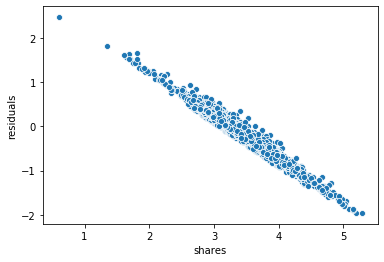

In [15]:
sns.scatterplot(x=y_test, y=resid,data=df)
plt.xlabel('shares')
plt.ylabel('residuals')

plt.show()

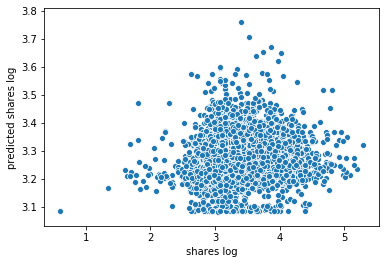

In [11]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('shares log')
plt.ylabel('predicted shares log')
plt.show()

This plot shows that the prediction is pretty good because a big amount of the values is between 3 and 4. 

In [16]:
y_test_p = lm.predict(X_test) 
r2_score(y_test, y_test_p)

0.025697296641941647

The R2 score of the model is 0.025%

In [13]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4007806707933104

In [ ]:
The RMSE of the model is 0.40. 

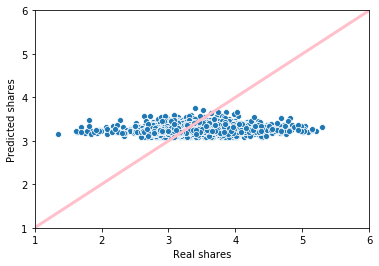

In [14]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Real shares')
plt.ylabel('Predicted shares')
plt.xlim([1,6]) 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='pink', lw=3) 
plt.show()

This plot shows that the prediction of the model isn't that great. The only part that correct is between 3 and 4  real shares.